In [331]:
from scipy.stats import norm
import numpy as np
import math
import random
import matplotlib.pyplot as plt

#adapted from Octave's financial toolkit
def blsprice(Price, Strike, Rate, Time, Volatility):
    sigma_sqrtT = Volatility * np.sqrt (Time)

    d1 = 1 / sigma_sqrtT * (np.log(Price / Strike) + (Rate + Volatility**2 / 2) * Time)
    d2 = d1 - sigma_sqrtT

    phi1 = norm.cdf(d1)
    phi2 = norm.cdf(d2)
    disc = np.exp (-Rate * Time)
    F    = Price * np.exp ((Rate) * Time)

    Call = disc * (F * phi1 - Strike * phi2)
    Put  = disc * (Strike * (1 - phi2) + F * (phi1 - 1))
    return Put

In [332]:
L1 = [] #creating an empty list to store values

def MCpricing(P,K,r,T,Sigma, Timestep, Simulations):
    N = int(T/Timestep)
    S1 = np.ones(Simulations) * P
    K0 = np.ones(Simulations) * K
    for i in range(0,N):
        rand = np.random.normal(0,1,Simulations)
        x = (r*Timestep+sigma * rand * np.sqrt(Timestep))
        S1 = np.add(S1,np.multiply(S1,x))
    L1 = S1
    L2 = np.subtract(K0, L1)
    L3 = np.maximum(L2,0)
    std = np.std(L3)
    x = np.exp(-r*T) * (sum(L3)/Simulations)
    LB = np.exp(-r*T) * ((sum(L3)/Simulations)-(2.575*(std/(np.sqrt(Simulations)))))#Confidence Interval-Lower end
    UB = np.exp(-r*T)* ((sum(L3)/Simulations)+(2.575*(std/(np.sqrt(Simulations)))))#Confidence Interval-Upper end
    return x

def MCpricing1(P,K,r,T,Sigma, Timestep, Simulations): # to get the upper and lower bound
    N = int(T/Timestep)
    S1 = np.ones(Simulations) * P
    K0 = np.ones(Simulations) * K
    for i in range(0,N):
        rand = np.random.normal(0,1,Simulations)
        x = (r*Timestep+sigma * rand * np.sqrt(Timestep))
        S1 = np.add(S1,np.multiply(S1,x))
    L1 = S1
    L2 = np.subtract(K0, L1)
    L3 = np.maximum(L2,0)
    std = np.std(L3)
    x = np.exp(-r*T) * (sum(L3)/Simulations)
    LB = np.exp(-r*T) * ((sum(L3)/Simulations)-(2.575*(std/(np.sqrt(Simulations)))))#Confidence Interval-Lower end
    UB = np.exp(-r*T)* ((sum(L3)/Simulations)+(2.575*(std/(np.sqrt(Simulations)))))#Confidence Interval-Upper end
    return x
    return x, LB, UB

In [333]:
sigma = 0.22
r = 0.06
T = 1.5
K = 100
S0 = 100
M = [2000,4000,8000,16000,32000,64000,128000]
print('delt_t', ' Simulations', '  Value' )
for j in [5/250,2.5/250,1/250]:
    for i in range(0,7):
        x = MCpricing(K,S0,r,T,sigma, j, M[i])
        print(j,"  ", M[i],"       ", x)

delt_t  Simulations   Value
0.02    2000         6.716242244206927
0.02    4000         6.349579462373367
0.02    8000         6.465527357966615
0.02    16000         6.459302546106414
0.02    32000         6.536593347288971
0.02    64000         6.49784401601957
0.02    128000         6.538984259368509
0.01    2000         6.6778880755568135
0.01    4000         6.591292778748683
0.01    8000         6.635790202327146
0.01    16000         6.504191512928586
0.01    32000         6.5080781290273855
0.01    64000         6.5526751074171585
0.01    128000         6.457829007022018
0.004    2000         6.271117930953972
0.004    4000         6.399087987716402
0.004    8000         6.460364379380443
0.004    16000         6.473460165570609
0.004    32000         6.551816168190071
0.004    64000         6.5442876539015336
0.004    128000         6.52677201087936


In [334]:
sigma = 0.22
r = 0.06
T = 1.5
K = 100
S0 = 100
Timestep = 1/250
print('delt_t', ' Simulations', '    Value', '         Lower Bound', '        Upper Bound' )
M = [2000,4000,8000,16000,32000,64000,128000]
for i in range(0,7):
    x = MCpricing1(K,S0,r,T,sigma, Timestep, M[i])
    print(Timestep,"    ",M[i],"  ", x)

delt_t  Simulations     Value          Lower Bound         Upper Bound
0.004      2000    (6.916048985217047, 6.301057785157357, 7.531040185276737)
0.004      4000    (6.547128040219095, 6.123469016645454, 6.970787063792736)
0.004      8000    (6.415552396174829, 6.1197412222429906, 6.711363570106667)
0.004      16000    (6.627619939322677, 6.41453569603822, 6.8407041826071335)
0.004      32000    (6.440504662026202, 6.292570045686862, 6.588439278365541)
0.004      64000    (6.4784209658084855, 6.372948648096751, 6.5838932835202195)
0.004      128000    (6.544207278421665, 6.469452420726524, 6.6189621361168065)


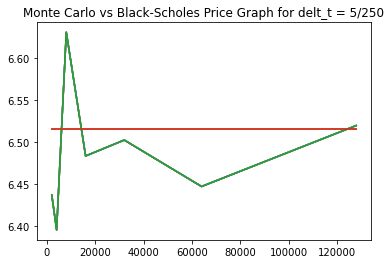

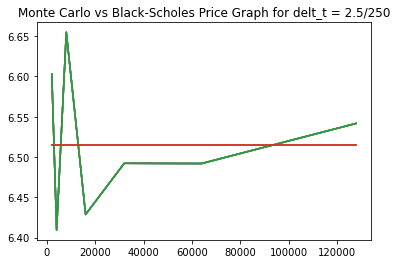

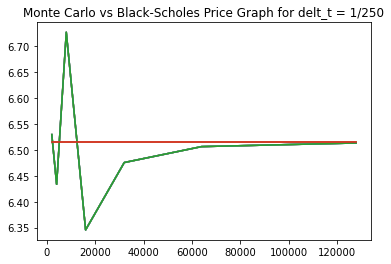

In [339]:
x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []
z1 = []
z2 = []
z3 = []
M = [2000,4000,8000,16000,32000,64000,128000]

# for delt_T = 5/250
for i in range(0,7):
    x3.append(2000 * 2 ** i)
    x1.append(MCpricing(100,100,0.06,1.5,0.22,5/250,M[i]))
    x2.append(blsprice(100,100,0.06,1.5,0.22))
    
for i in range(len(x1)):
    plt.plot(x3,x1,x3,x2)
plt.title('Monte Carlo vs Black-Scholes Price Graph for delt_t = 5/250')
plt.show()

# for delt_T = 2.5/250
for i in range(0,7):
    y3.append(2000 * 2 ** i)
    y1.append(MCpricing(100,100,0.06,1.5,0.22,2.5/250,M[i]))
    y2.append(blsprice(100,100,0.06,1.5,0.22))
    
for i in range(len(y1)):
    plt.plot(y3,y1,y3,y2)
plt.title('Monte Carlo vs Black-Scholes Price Graph for delt_t = 2.5/250')
plt.show()

# for delt_T = 1/250
for i in range(0,7):
    z3.append(2000 * 2 ** i)
    z1.append(MCpricing(100,100,0.06,1.5,0.22,1/250,M[i]))
    z2.append(blsprice(100,100,0.06,1.5,0.22))
    
for i in range(len(y1)):
    plt.plot(z3,z1,z3,z2)
plt.title('Monte Carlo vs Black-Scholes Price Graph for delt_t = 1/250')
plt.show()